In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("GOOGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...,...
4966,2024-05-13,164.259995,169.279999,164.000000,169.139999,169.139999,31327600
4967,2024-05-14,169.770004,171.250000,168.800003,170.339996,170.339996,25127100
4968,2024-05-15,170.630005,172.649994,170.509995,172.509995,172.509995,26948400
4969,2024-05-16,173.289993,175.119995,172.690002,174.179993,174.179993,27867900


Text(0, 0.5, 'Stock Volume')

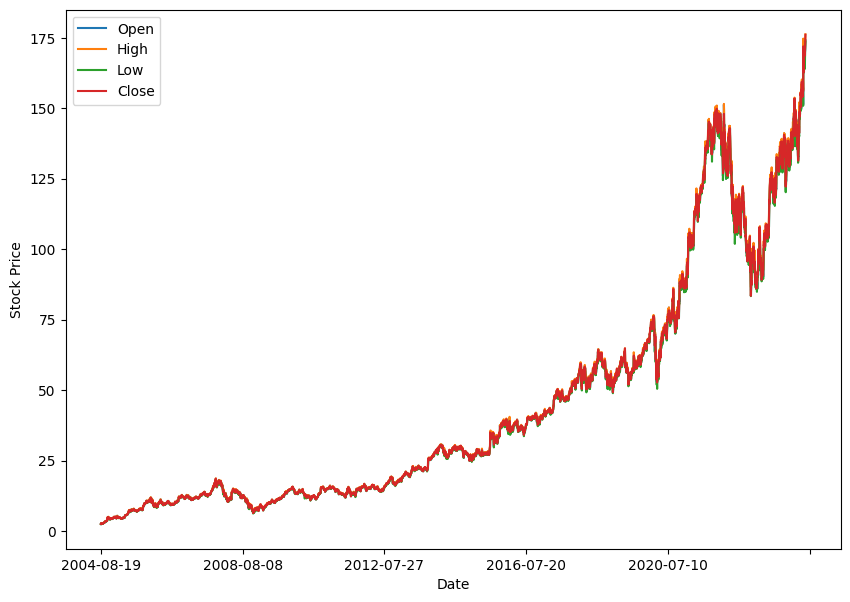

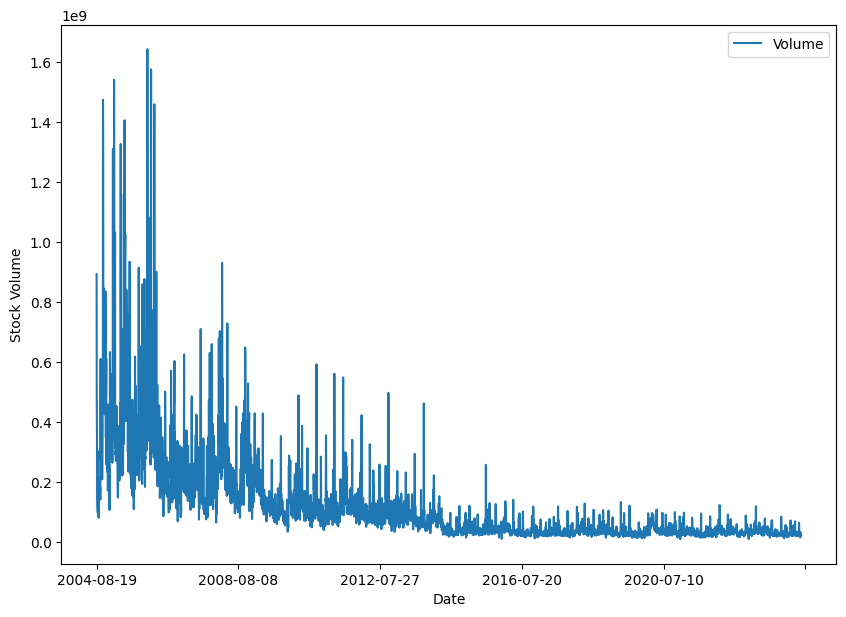

In [3]:
ax1 = df.plot(x="Date", y = ["Open","High","Low","Close"], figsize=(10,7))
ax1.set_ylabel("Stock Price")

ax2 = df.plot(x="Date", y="Volume", figsize=(10,7))
ax2.set_ylabel("Stock Volume")

In [4]:
data = df['Close'].values.reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [8]:
def create_sequences(data, time_steps=60):
    x,y = [], []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i, 0])
        y.append(data[i,0])
    return np.array(x), np.array(y)

time_steps = 60
x_train, y_train = create_sequences(train_data, time_steps)
x_test, y_test = create_sequences(test_data, time_steps)

In [9]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(time_steps,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

C:\Users\prasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])

In [12]:
history = model.fit(x_train,y_train, epochs = 10, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0032 - mae: 0.0319 - val_loss: 7.5097e-04 - val_mae: 0.0214
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.8083e-04 - mae: 0.0109 - val_loss: 7.6741e-04 - val_mae: 0.0225
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 2.3432e-04 - mae: 0.0099 - val_loss: 0.0020 - val_mae: 0.0376
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.4797e-04 - mae: 0.0102 - val_loss: 8.1735e-04 - val_mae: 0.0231
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.2502e-04 - mae: 0.0098 - val_loss: 9.5461e-04 - val_mae: 0.0251
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1.8153e-04 - mae: 0.0085 - val_loss: 6.4475e-04 - val_mae: 0.0199
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.6660e-04 - mae: 0.0086 - val_loss: 0.0011 - val_mae: 0.0271
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.4395e-04 - mae: 0.0077 - val_loss: 0.0013 - val_mae: 0.0303


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

In [18]:
accuracy_score(y_test,y_

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9179e-04 - mae: 0.0195 


[0.00079349399311468, 0.022841082885861397]

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


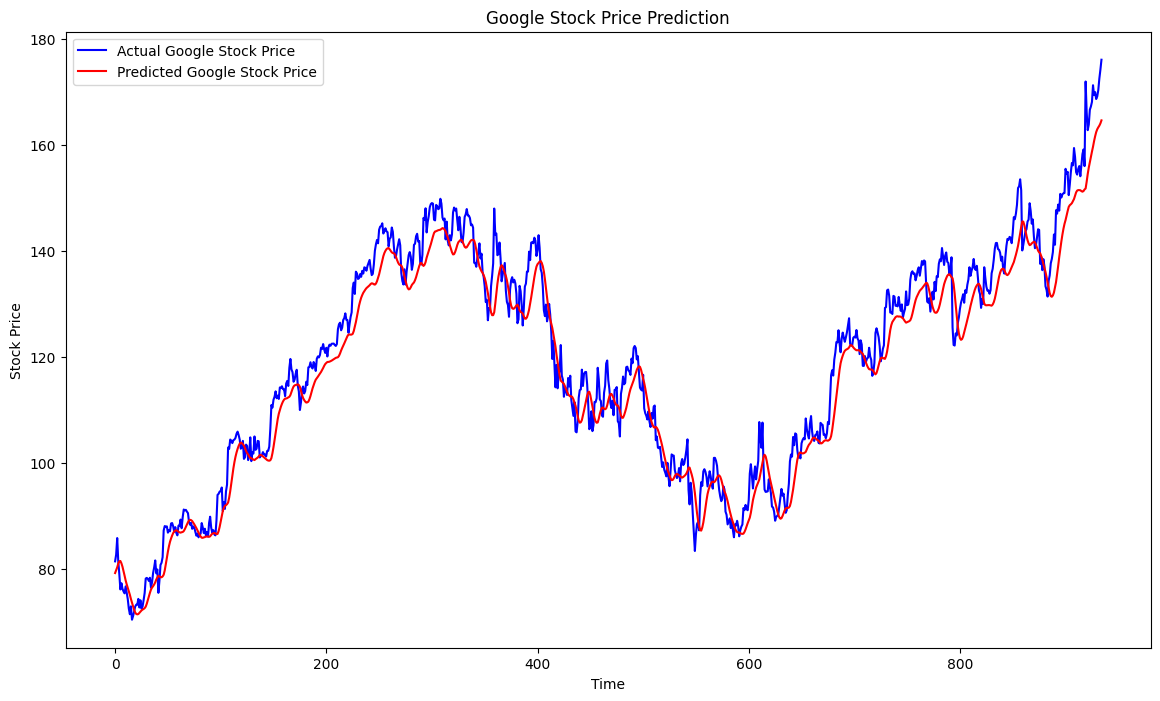

In [17]:
plt.figure(figsize=(14,8))
plt.plot(actual, color='blue', label='Actual Google Stock Price')
plt.plot(predictions, color='red', label = 'Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')    
plt.ylabel("Stock Price")
plt.legend()
plt.show()